### Dataset - Normalized with Min-max method / Without Redshift

#### Random Forest algorithm 

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df_rf_wr = pd.read_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_mm_wr.csv")

In [93]:
df_rf_wr

,alpha,delta,u,g,r,i,z,class
0,0.472803,0.677462,0.998994,0.999092,0.527008,0.434177,0.999009,0
1,0.303044,0.572530,0.998695,0.998925,0.527996,0.489885,0.999222,0
2,0.005302,0.362428,0.998932,0.999082,0.555528,0.516271,0.999187,0
3,0.474755,0.380538,0.998767,0.998804,0.388109,0.333769,0.998792,0
4,0.595306,0.213180,0.998691,0.998716,0.350548,0.302683,0.998723,0
...,...,...,...,...,...,...,...,...
56878,0.570563,0.572008,0.998900,0.999043,0.558451,0.497201,0.999193,2
56879,0.036093,0.193240,0.999066,0.999016,0.481001,0.380677,0.998867,2
56880,0.560834,0.539862,0.998664,0.998771,0.407412,0.363928,0.998888,2
56881,0.016374,0.528663,0.998509,0.998588,0.299670,0.277048,0.998685,2


In [94]:
x = df_rf_wr.drop("class",axis='columns')
x.head()

,alpha,delta,u,g,r,i,z
0,0.472803,0.677462,0.998994,0.999092,0.527008,0.434177,0.999009
1,0.303044,0.572530,0.998695,0.998925,0.527996,0.489885,0.999222
2,0.005302,0.362428,0.998932,0.999082,0.555528,0.516271,0.999187
3,0.474755,0.380538,0.998767,0.998804,0.388109,0.333769,0.998792
4,0.595306,0.213180,0.998691,0.998716,0.350548,0.302683,0.998723


In [95]:
y = df_rf_wr["class"]
y

0        0
1        0
2        0
3        0
4        0
        ..
56878    2
56879    2
56880    2
56881    2
56882    2
Name: class, Length: 56883, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [97]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
y_pred = model.predict(x_test)


In [101]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[1747,   77,  115],
       [ 130, 1593,  167],
       [ 180,  204, 1476]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

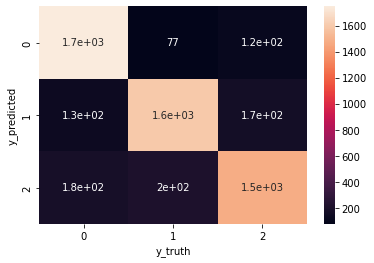

In [102]:
sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8465459658991036
Precision: 0.846312965138588
Recall: 0.8457951388311234
F1 Score: 0.8455782432921181


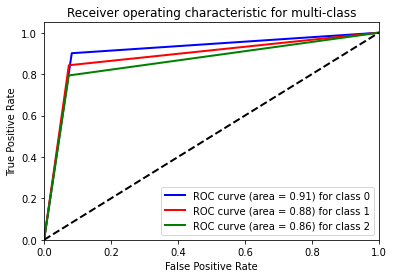

In [104]:
# Plot ROC curve for each class separately

import numpy as np

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()